# 周三任务
1. 使用pytorch搭建神经网络模型，实现对KMNIST数据集的训练。
https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST
2. 尝试调整模型结构（变更神经元数量，增加隐藏层）来提升模型预测的准确率
3. 调试超参数，观察学习率和批次大小对训练的影响。

#### 3调试超参数 观察训练结果

In [14]:
# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [15]:
# 定义超参数
epochs = 20
BATCH_SIZE = 128

In [16]:
# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True,
                         transform=ToTensor())


/opt/conda/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [17]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [18]:
def train_iter(epochs, model, trian_dl, lr):
    train_hist = []

    # 损失函数&优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    # 优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # 提取训练数据
        for data, target in trian_dl:
            # 前向运算
            output = model(data.reshape(-1, 784))
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()  # 所有参数梯度清零
            loss.backward()     # 计算梯度（参数.grad）
            optimizer.step()    # 更新参数

        print(f'Epoch:{epoch} Loss: {loss.item()}')
        train_hist.append(loss.item())

    return train_hist

In [26]:
import matplotlib.pyplot as plt

def draw_train_hist(hist_list):
    for i,hist in enumerate(hist_list):   
        plt.plot(hist, label=f'Loss{i}')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [20]:
# 测试
def test_acc(test_dl, model):
    correct = 0
    total = 0
    with torch.no_grad():  # 不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
            total += target.size(0)  # size(0) 等效 shape[0]
            correct += (predicted == target).sum().item()
    return correct/total*100

In [ ]:
models = torch.nn.ModuleList([
    nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)) for _ in range(3)
])


In [22]:
train_hists = [train_iter(epochs, model, trian_dl, lr=lr) for model, lr in zip(models, [0.01, 0.001, 0.0001])]

Epoch:0 Loss: 1.8254718780517578
Epoch:1 Loss: 1.196607232093811
Epoch:2 Loss: 0.8403001427650452
Epoch:3 Loss: 0.8278729319572449
Epoch:4 Loss: 0.6821625232696533
Epoch:5 Loss: 0.5146372318267822
Epoch:6 Loss: 0.4630706310272217
Epoch:7 Loss: 0.5218631029129028
Epoch:8 Loss: 0.3643108308315277
Epoch:9 Loss: 0.4506162405014038
Epoch:10 Loss: 0.38661813735961914
Epoch:11 Loss: 0.3354370594024658
Epoch:12 Loss: 0.32556381821632385
Epoch:13 Loss: 0.2869400978088379
Epoch:14 Loss: 0.37434759736061096
Epoch:15 Loss: 0.35086914896965027
Epoch:16 Loss: 0.24951744079589844
Epoch:17 Loss: 0.23344528675079346
Epoch:18 Loss: 0.2957324981689453
Epoch:19 Loss: 0.31484881043434143
Epoch:0 Loss: 2.2920453548431396
Epoch:1 Loss: 2.2685272693634033
Epoch:2 Loss: 2.252197265625
Epoch:3 Loss: 2.2107694149017334
Epoch:4 Loss: 2.1958982944488525
Epoch:5 Loss: 2.131809711456299
Epoch:6 Loss: 2.075786590576172
Epoch:7 Loss: 1.9991084337234497
Epoch:8 Loss: 1.945763111114502
Epoch:9 Loss: 1.8106365203857422
E

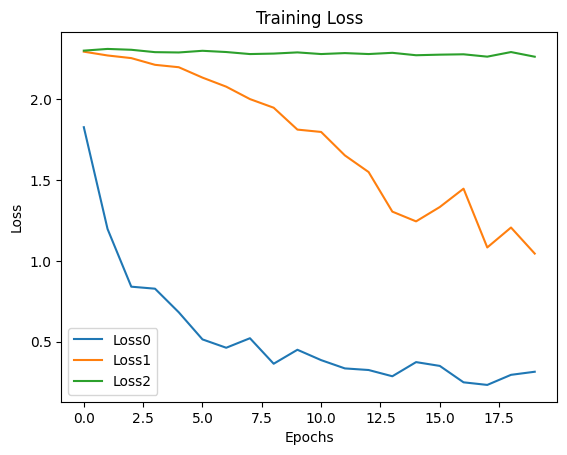

In [27]:
draw_train_hist(train_hists)

In [28]:
for i in range(len(models)):
    print(f'Model{i+1} Acc:', test_acc(test_dl, models[i]))
    torch.save(models[i].state_dict(), f'model{i+1}.pth')

Model1 Acc: 80.17999999999999
Model2 Acc: 55.910000000000004
Model3 Acc: 20.84


#### 观察不同batch_size 训练结果

In [29]:
models = torch.nn.ModuleList([
    nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)) for _ in range(3)
])

In [30]:
train_datas = [DataLoader(train_data, batch_size=bs, shuffle=True) for bs in [128,256, 512]]

train_hists = [train_iter(epochs, model, dl, lr=0.01) for model, dl in zip(models, train_datas)]

Epoch:0 Loss: 1.8439041376113892
Epoch:1 Loss: 1.01694655418396
Epoch:2 Loss: 0.7546858787536621
Epoch:3 Loss: 0.6889527440071106
Epoch:4 Loss: 0.5260869860649109
Epoch:5 Loss: 0.5507275462150574
Epoch:6 Loss: 0.5047656297683716
Epoch:7 Loss: 0.6740844249725342
Epoch:8 Loss: 0.3255011737346649
Epoch:9 Loss: 0.4387110769748688
Epoch:10 Loss: 0.3864118754863739
Epoch:11 Loss: 0.3744462728500366
Epoch:12 Loss: 0.39645087718963623
Epoch:13 Loss: 0.39198601245880127
Epoch:14 Loss: 0.3607494533061981
Epoch:15 Loss: 0.2959645688533783
Epoch:16 Loss: 0.39106640219688416
Epoch:17 Loss: 0.3322598934173584
Epoch:18 Loss: 0.41414377093315125
Epoch:19 Loss: 0.3314570188522339
Epoch:0 Loss: 2.17352032661438
Epoch:1 Loss: 1.7898889780044556
Epoch:2 Loss: 1.3044625520706177
Epoch:3 Loss: 1.113234043121338
Epoch:4 Loss: 0.9147264361381531
Epoch:5 Loss: 0.6111348271369934
Epoch:6 Loss: 0.6271892189979553
Epoch:7 Loss: 0.8258612155914307
Epoch:8 Loss: 0.6798682808876038
Epoch:9 Loss: 0.7752783894538879
E

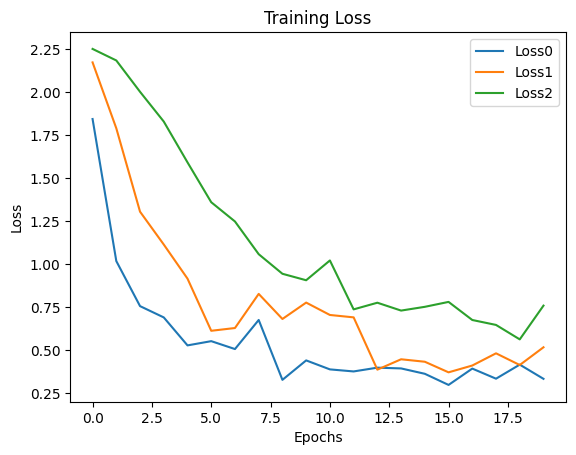

In [31]:
draw_train_hist(train_hists)

In [ ]:
for i in range(len(models)):
    print(f'Model{i+1} Acc:', test_acc(test_dl, models[i]))
    torch.save(models[i].state_dict(), f'model{i+1}.pth')

Model1 Acc: 80.61
Model2 Acc: 74.83
Model3 Acc: 67.99
